In [1]:
#Importing all the standard libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Here dataset salary contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not

In [2]:
df=pd.read_csv('salary1.csv')  #load the dataset by using pandas function

In [3]:
df.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [4]:
df.isnull().sum()  #checking the null values

Unnamed: 0        0
age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1032 non-null   int64 
 1   age             1032 non-null   int64 
 2   Workclass       1032 non-null   object
 3   fnlwgt          1032 non-null   int64 
 4   education       1032 non-null   object
 5   education-num   1032 non-null   int64 
 6   marital-status  1032 non-null   object
 7   occupation      1032 non-null   object
 8   relationship    1032 non-null   object
 9   race            1032 non-null   object
 10  sex             1032 non-null   object
 11  capital-gain    1032 non-null   int64 
 12  capital-loss    1032 non-null   int64 
 13  hours-per-week  1032 non-null   int64 
 14  native-country  1032 non-null   object
 15  Income          1032 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 129.1+ KB


In [6]:
df_cat=df.select_dtypes("object")

In [7]:
df_num=df.select_dtypes(["float64","int64"])

In [8]:
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [9]:
df_num.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,0,39,77516,13,2174,0,40,0
1,1,50,83311,13,0,0,13,0
2,2,38,215646,9,0,0,40,0
3,3,53,234721,7,0,0,40,0
4,4,28,338409,13,0,0,40,0


In [10]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder  #using labelencoder to convert categorical data to numeric 
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [12]:
df_new=pd.concat([df_cat,df_num],axis=1)   #concatenating the categorical and numeric data after labelencoding


In [13]:
df_new.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,5,9,4,0,1,4,1,28,0,39,77516,13,2174,0,40,0
1,4,9,2,3,0,4,1,28,1,50,83311,13,0,0,13,0
2,2,11,0,5,1,4,1,28,2,38,215646,9,0,0,40,0
3,2,1,2,5,0,2,1,28,3,53,234721,7,0,0,40,0
4,2,9,2,9,5,2,0,4,4,28,338409,13,0,0,40,0


In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [15]:
X=df_new.drop("Income",axis=1)
Y=df_new["Income"]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [18]:
pd.Series(Y_train).value_counts() #checking whether data is balanced or not.

0    540
1    182
Name: Income, dtype: int64

In [19]:
ros=RandomOverSampler()

In [20]:
X_train,Y_train = ros.fit_resample(X_train,Y_train)

In [21]:
pd.Series(Y_train).value_counts()

1    540
0    540
Name: Income, dtype: int64

In [22]:
ss=StandardScaler()   #scaling on training and testing data 
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)


In [23]:
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print('confusion matrix')
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [24]:
lr=LogisticRegression()  #creating the object of logistic regresssion

In [25]:
lr=create_model(lr) #call 

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       238
           1       0.50      0.71      0.58        72

    accuracy                           0.76       310
   macro avg       0.70      0.74      0.71       310
weighted avg       0.80      0.76      0.78       310

confusion matrix
[[186  52]
 [ 21  51]]


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt=DecisionTreeClassifier()  #object of Dt classifier
dt=create_model(dt)  #call

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       238
           1       0.57      0.60      0.58        72

    accuracy                           0.80       310
   macro avg       0.72      0.73      0.72       310
weighted avg       0.80      0.80      0.80       310

confusion matrix
[[205  33]
 [ 29  43]]


In [28]:
dt.feature_importances_  #features not important that are reduced to exact 0 helps in feature selection

array([0.03325031, 0.03183892, 0.29834036, 0.02972312, 0.01505687,
       0.01594185, 0.        , 0.00418301, 0.08041675, 0.14083423,
       0.11173447, 0.15274541, 0.02951651, 0.00318342, 0.05323478])

In [29]:
X.columns

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Unnamed: 0', 'age',
       'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

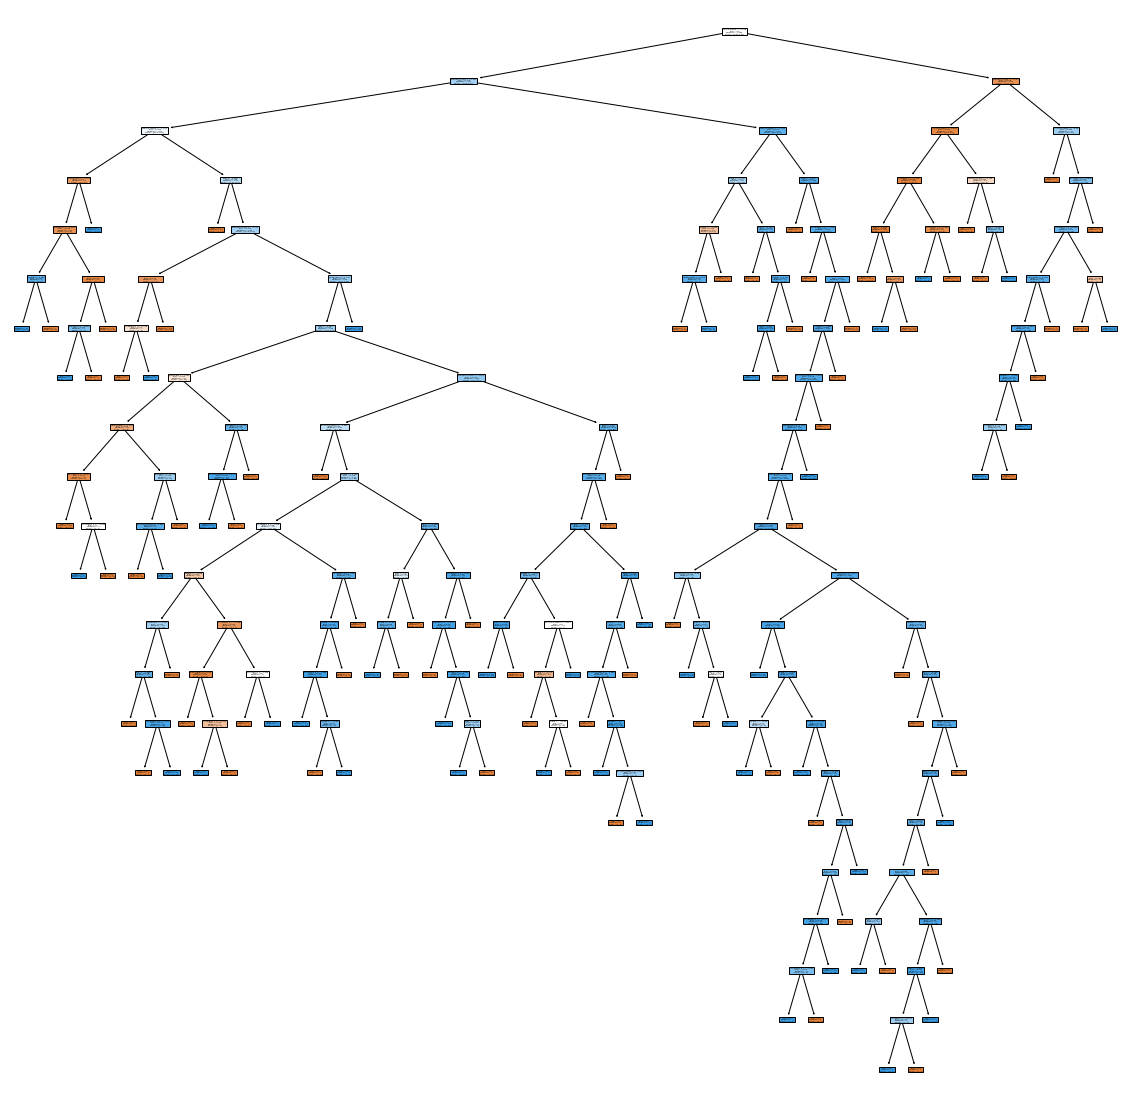

In [30]:
#Decision Tree structure
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [31]:
#using pruning technique as recall is not that good in Decision tree maybe due to overfitting
#Max depth: inbuilt parameter   and by default gini index
dt1 = DecisionTreeClassifier(max_depth=5)   #cannotbe more than 8

In [32]:
dt1 = create_model(dt1)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       238
           1       0.48      0.86      0.62        72

    accuracy                           0.75       310
   macro avg       0.71      0.79      0.72       310
weighted avg       0.84      0.75      0.77       310

confusion matrix
[[172  66]
 [ 10  62]]


In [33]:
dt1.feature_importances_

array([0.        , 0.02656334, 0.5005149 , 0.        , 0.00414238,
       0.        , 0.        , 0.00920529, 0.02784879, 0.09176129,
       0.0535217 , 0.23680817, 0.02320726, 0.        , 0.02642688])

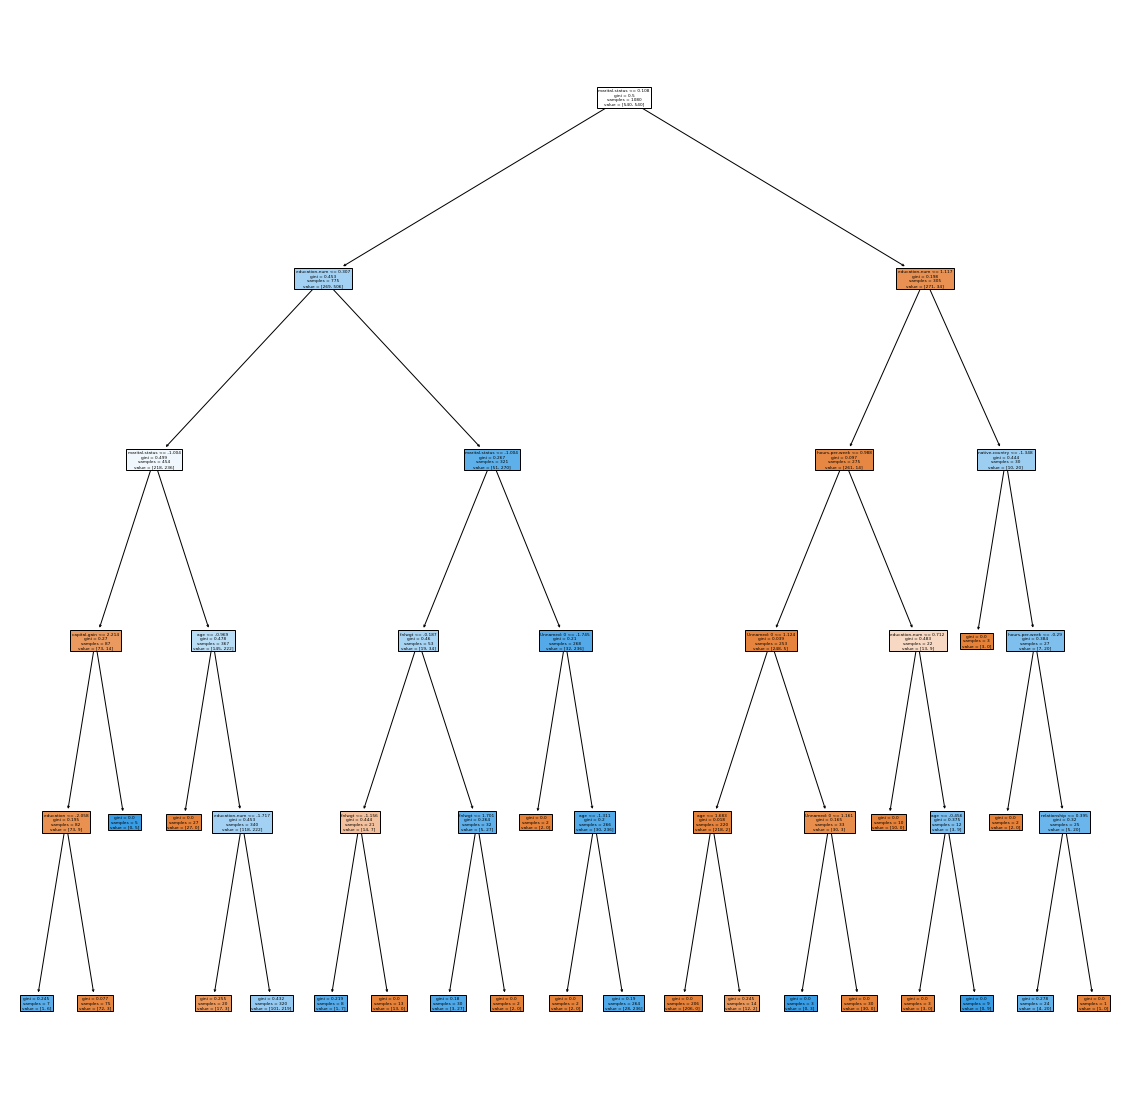

In [34]:
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [35]:
#2nd pruning method min_samples_leaf  : inbuilt parameter
#leaf means no child
dt2=DecisionTreeClassifier(min_samples_leaf=65) #min_samples_leaf =50 or more means not less than=50

In [36]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       238
           1       0.55      0.68      0.61        72

    accuracy                           0.80       310
   macro avg       0.72      0.76      0.74       310
weighted avg       0.82      0.80      0.80       310

confusion matrix
[[198  40]
 [ 23  49]]


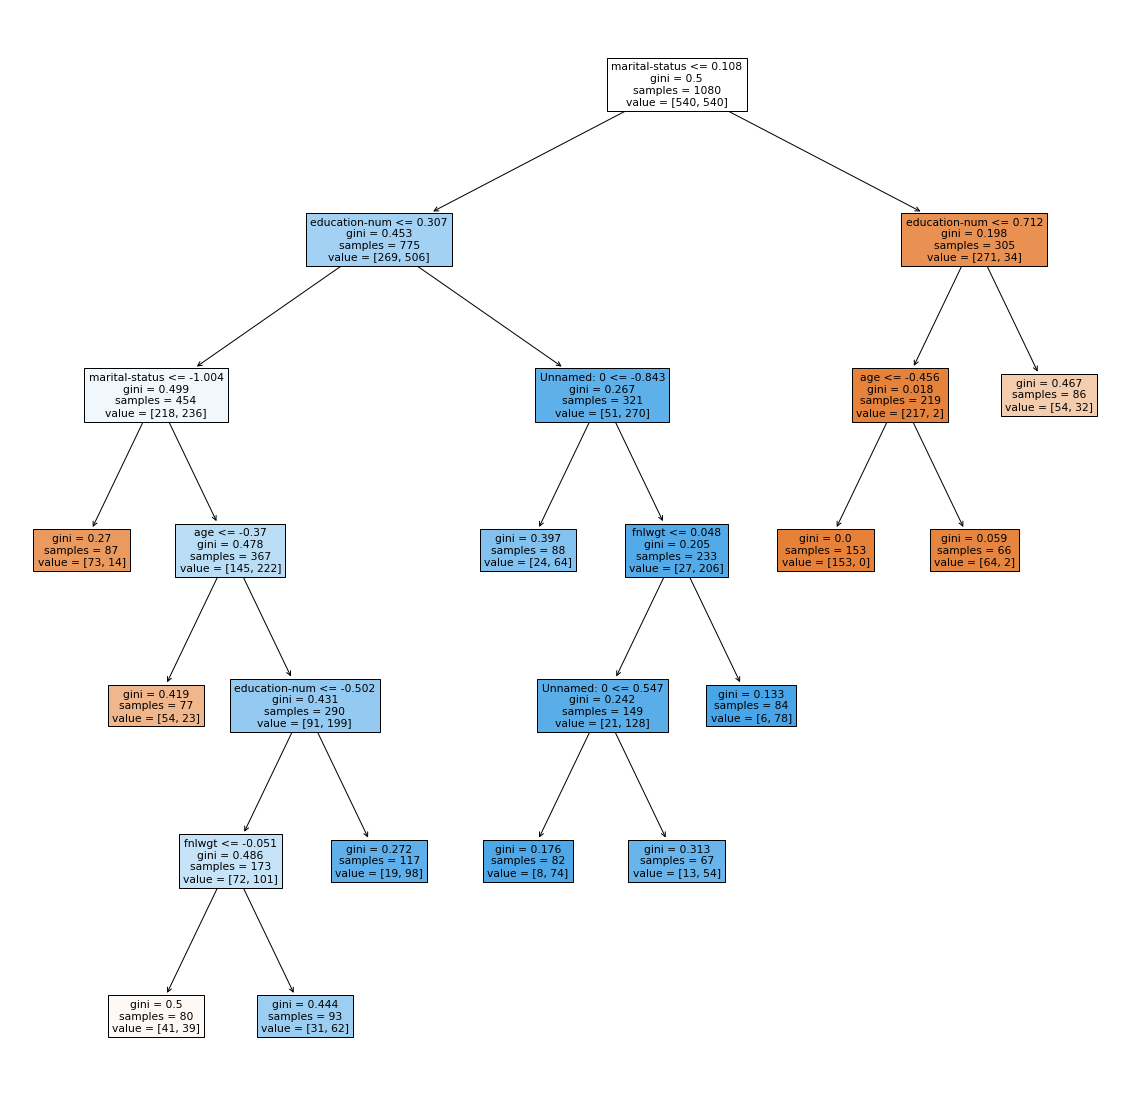

In [37]:
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [38]:
##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)

In [39]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       238
           1       0.55      0.75      0.64        72

    accuracy                           0.80       310
   macro avg       0.73      0.78      0.75       310
weighted avg       0.83      0.80      0.81       310

confusion matrix
[[194  44]
 [ 18  54]]


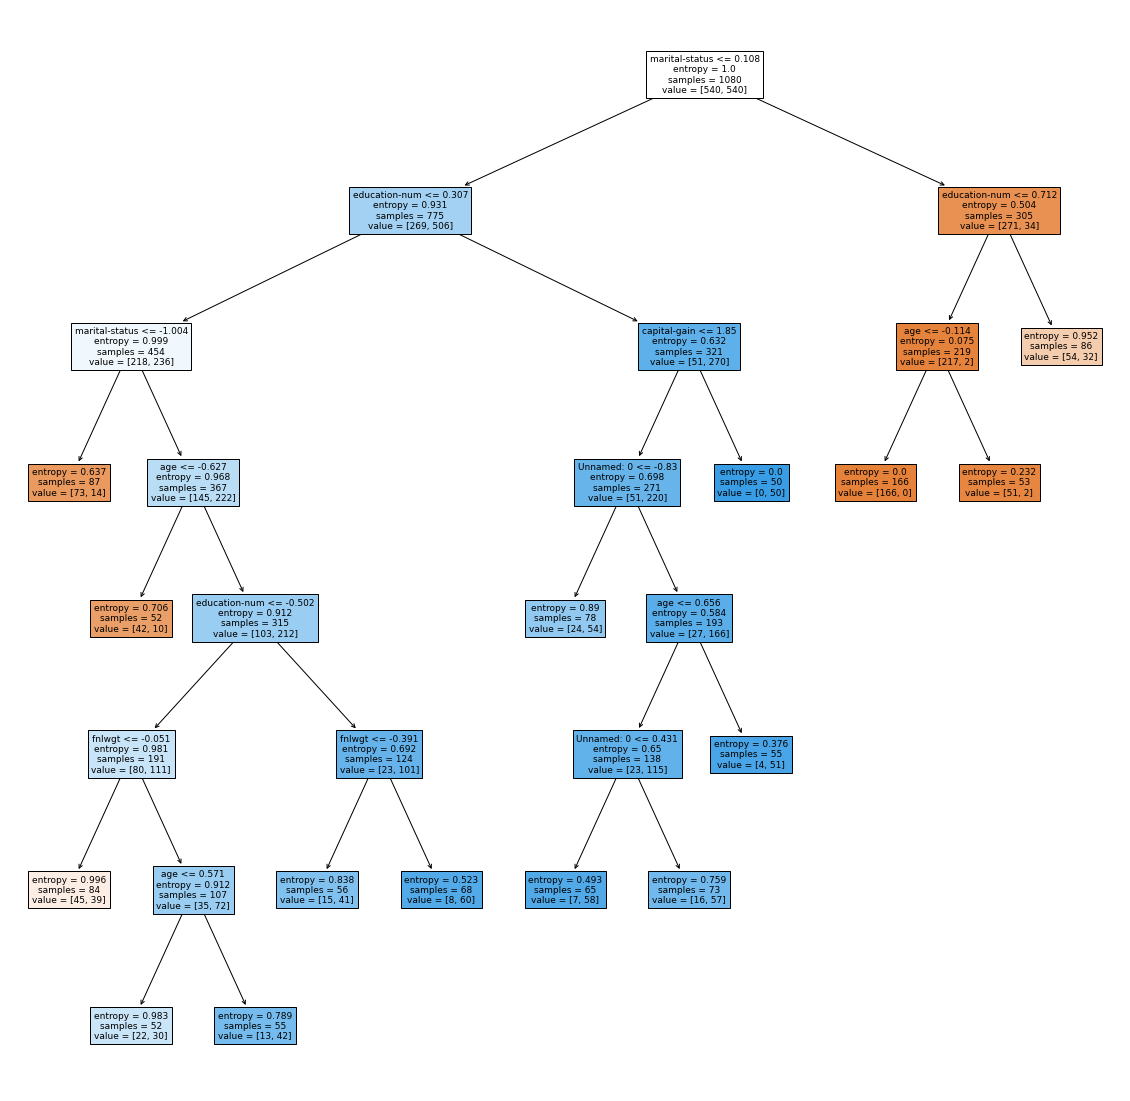

In [41]:
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [40]:
#note:-Applied both Logistic as well as Decision TRee classifier on salary dataset
#DecisionTreeClassifier with max_depth and entropy are giving good results for this particular dataset
